<a href="https://colab.research.google.com/github/tanp2612/ML-StockMarketPredictionAndForecastingUsingStackedLSTM/blob/master/StockMarketLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import pandas as pd
import datetime

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv(r"/content/drive/MyDrive/NSE-TATAGLOBAL.csv")

In [5]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
data.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
df = data.reset_index()['Open']
print(df)

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64


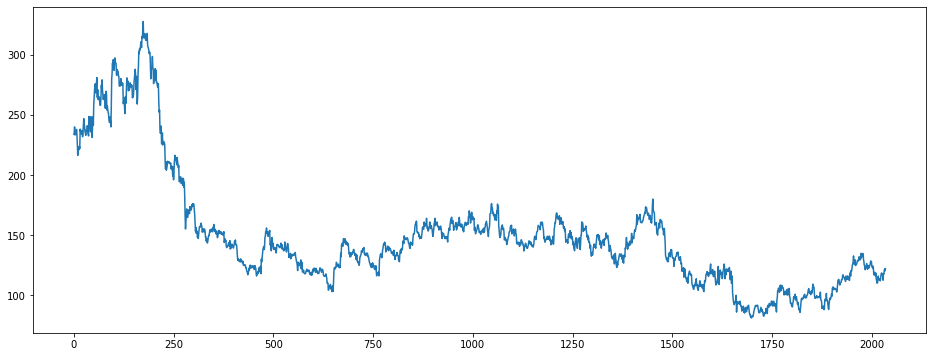

In [9]:
data['Open'].plot(figsize=(16,6))

In [10]:
data.rolling(7).mean().head(20)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,235.200000,237.557143,231.135714,234.414286,234.307143,3.274848e+06,7652.388571
7,235.750000,238.028571,231.607143,234.700000,234.492857,3.209831e+06,7509.724286
8,235.550000,238.200000,231.485714,235.071429,234.971429,2.936693e+06,6879.075714
9,233.185714,237.728571,230.171429,234.928571,234.928571,3.527693e+06,8241.347143


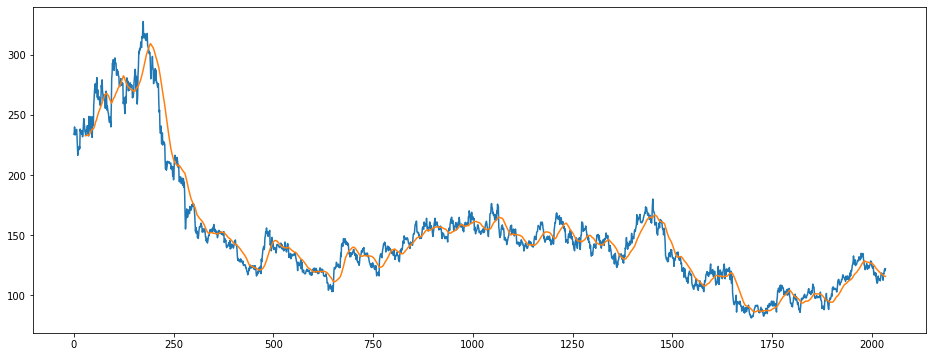

In [11]:
data['Open'].plot(figsize=(16,6))
data.rolling(window=30).mean()['Close'].plot()

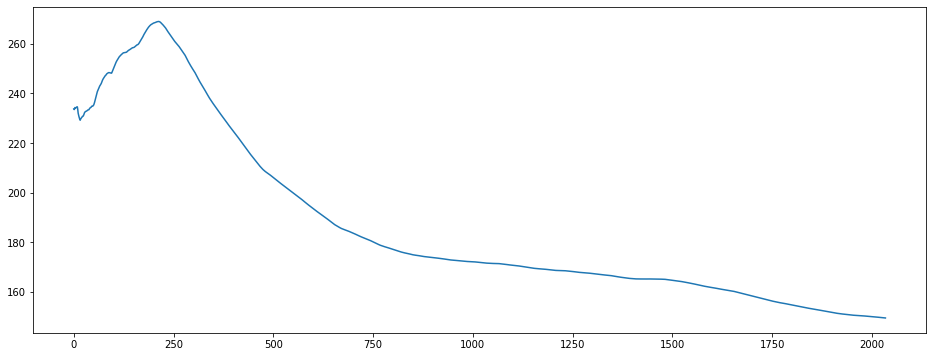

In [12]:
data['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [13]:
#@title Data Preprocessing


In [14]:
data.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
df = sc.fit_transform(np.array(df).reshape(-1,1))
df.shape

(2035, 1)

In [16]:
print(df)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


In [17]:
training_set = int(len(df)*0.75)
testing_set = len(df) - training_set
train_data, test_data = df[0 : training_set, :], df[training_set : len(df), :1]
training_set, testing_set

(1526, 509)

In [18]:
train_data, test_data

(array([[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.18491484],
        [0.15774534],
        [0.16180049]]), array([[0.15774534],
        [0.15774534],
        [0.16991079],
        [0.13746959],
        [0.14963504],
        [0.16605839],
        [0.15369019],
        [0.14152474],
        [0.13341444],
        [0.13260341],
        [0.12368208],
        [0.12246553],
        [0.13625304],
        [0.11719384],
        [0.13746959],
        [0.15004055],
        [0.15308191],
        [0.15794809],
        [0.15186537],
        [0.14557989],
        [0.14497161],
        [0.14801298],
        [0.14476886],
        [0.11719384],
        [0.11151663],
        [0.10563666],
        [0.10218978],
        [0.09712084],
        [0.09691809],
        [0.11131387],
        [0.10644769],
        [0.11111111],
        [0.1202352 ],
        [0.11922141],
        [0.13219789],
        [0.10969181],
        [0.11232766],
        [0.10097324],
        [0.0971208

In [19]:
def create_dataset(dataset, time_step=1):
   train_X, train_Y = [], [] 
   for i in range(len(dataset)-time_step-1): 
       a = dataset[i:(i+time_step), 0]
       train_X.append(a)
       train_Y.append(dataset[i+time_step, 0]) 
   return np.array(train_X), np.array(train_Y)

In [20]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [21]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [23]:
regressor = Sequential()

In [24]:
regressor.add(LSTM(units=50, return_sequences = True, input_shape=(100, 1)))

regressor.add(LSTM(units=50, return_sequences = True))

regressor.add(LSTM(units=50))

regressor.add(Dense(units = 1))

In [25]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
regressor.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 12s 260ms/step - loss: 0.0233 - val_loss: 0.0109
Epoch 2/100
23/23 [==============================] - 5s 196ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 3/100
23/23 [==============================] - 4s 192ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4/100
23/23 [==============================] - 4s 193ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 5/100
23/23 [==============================] - 4s 190ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 6/100
23/23 [==============================] - 4s 190ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7/100
23/23 [==============================] - 4s 193ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/100
23/23 [==============================] - 4s 188ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/100
23/23 [==============================] - 4s 185ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/100
23/23 [==============================] - 4s 190ms/step - loss: 0.0011 - val_l

In [28]:
train_predict = regressor.predict(x_train)
test_predict =  regressor.predict(x_test)

In [29]:
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)
print('RMSE performance matrices : ', math.sqrt(mean_squared_error(y_train, train_predict)))

RMSE performance matrices :  161.58903247406244


In [30]:
print("Test data RMSE : ",math.sqrt(mean_squared_error(y_test, test_predict)))

Test data RMSE :  105.68591511763216


In [31]:
look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
                                                 
testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df) - 1, :] = test_predict

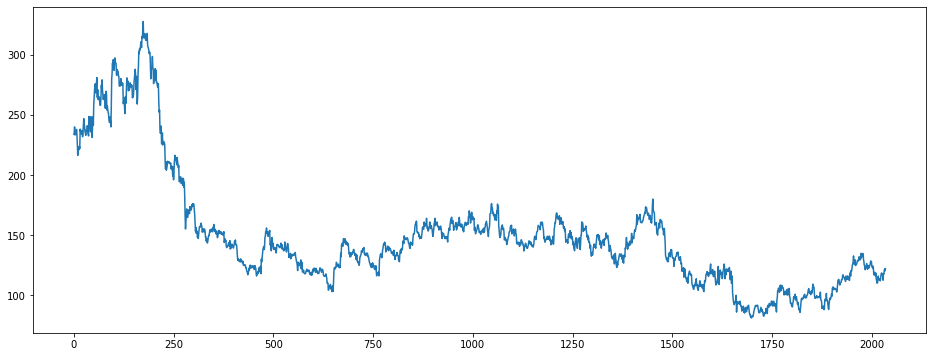

In [32]:
plt.subplots(figsize=(16,6))
plt.plot(sc.inverse_transform(df))

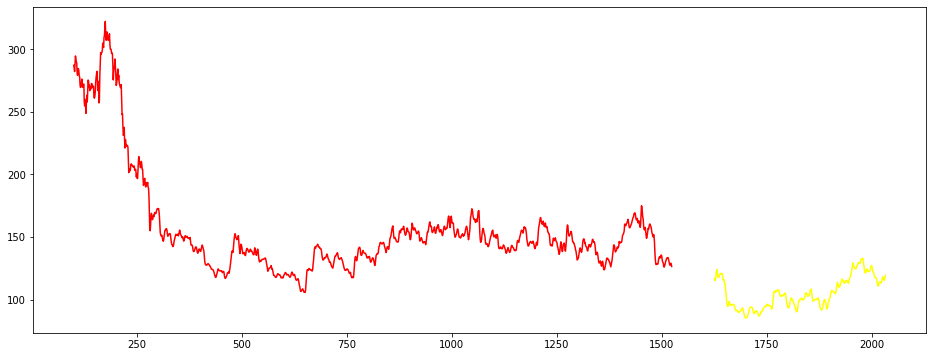

In [33]:
plt.subplots(figsize=(16,6))
plt.plot(trainPredictPlot, color='red')
plt.plot(testPredictPlot, color='yellow')

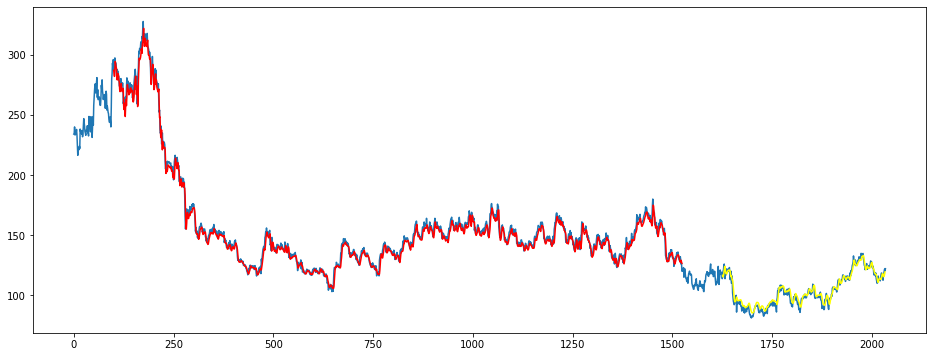

In [34]:
plt.subplots(figsize=(16,6))
plt.plot(sc.inverse_transform(df))
plt.plot(trainPredictPlot, color='red')
plt.plot(testPredictPlot, color='yellow')

In [35]:
print(len(test_data))

509


In [36]:
test_data.shape

(509, 1)

In [37]:
#past 100 days
x_ip = test_data[409:].reshape(1,-1)
x_ip.shape

(1, 100)

In [38]:
temp_ip = list(x_ip)
temp_ip = temp_ip[0].tolist()

In [39]:
lst_output=[]
n_steps=100
future_Days=15
i=0
while(i<future_Days):
  if(len(temp_ip)>100):
    x_ip=np.array(temp_ip[1:])
    print("Day {} input {}".format(i,x_ip))

    x_ip = x_ip.reshape(1,-1)
    x_ip = x_ip.reshape((1, n_steps, 1))
    yhat = regressor.predict(x_ip, verbose=0)
    print("Day {} output{}\n".format(i,yhat))

    temp_ip.extend(yhat[0].tolist())
    temp_ip = temp_ip[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_ip = x_ip.reshape((1, n_steps,1))  
    yhat = regressor.predict(x_ip, verbose=0)
    print(yhat[0])
    temp_ip.extend(yhat[0].tolist())
    print(len(temp_ip))
    lst_output.extend(yhat.tolist())
    i=i+1

[0.16256994]
101
Day 1 input [0.13746959 0.13990268 0.13017032 0.14152474 0.14111922 0.13138686
 0.12915653 0.13098135 0.1269262  0.15166261 0.15004055 0.14193025
 0.16017843 0.15693431 0.16504461 0.1770073  0.18146796 0.18815896
 0.20924574 0.19424169 0.18106245 0.18207624 0.1960665  0.17680454
 0.18207624 0.18004866 0.18207624 0.18876723 0.19383617 0.19099757
 0.19505272 0.19809408 0.20640714 0.19748581 0.19525547 0.20437956
 0.19870235 0.21796431 0.21553122 0.20600162 0.21654501 0.21654501
 0.2175588  0.19870235 0.19018654 0.17802109 0.175588   0.16301703
 0.16707218 0.17112733 0.17639903 0.18349554 0.1717356  0.16423358
 0.16991079 0.17619627 0.16788321 0.16909976 0.17396594 0.17741281
 0.18268451 0.19221411 0.18896999 0.19018654 0.17396594 0.17092457
 0.16788321 0.17477697 0.16443633 0.14557989 0.15287916 0.15369019
 0.15044607 0.14152474 0.15145985 0.13341444 0.12530414 0.11719384
 0.11780211 0.12489862 0.14132198 0.13098135 0.12935929 0.13240065
 0.12895377 0.12530414 0.13381995

In [40]:
day_new = np.arange(1,101)
day_pred = np.arange(101,116)

In [41]:
fd = df.tolist()
fd.extend(lst_output)

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
len(df)

2035

In [44]:
2035-100

1935

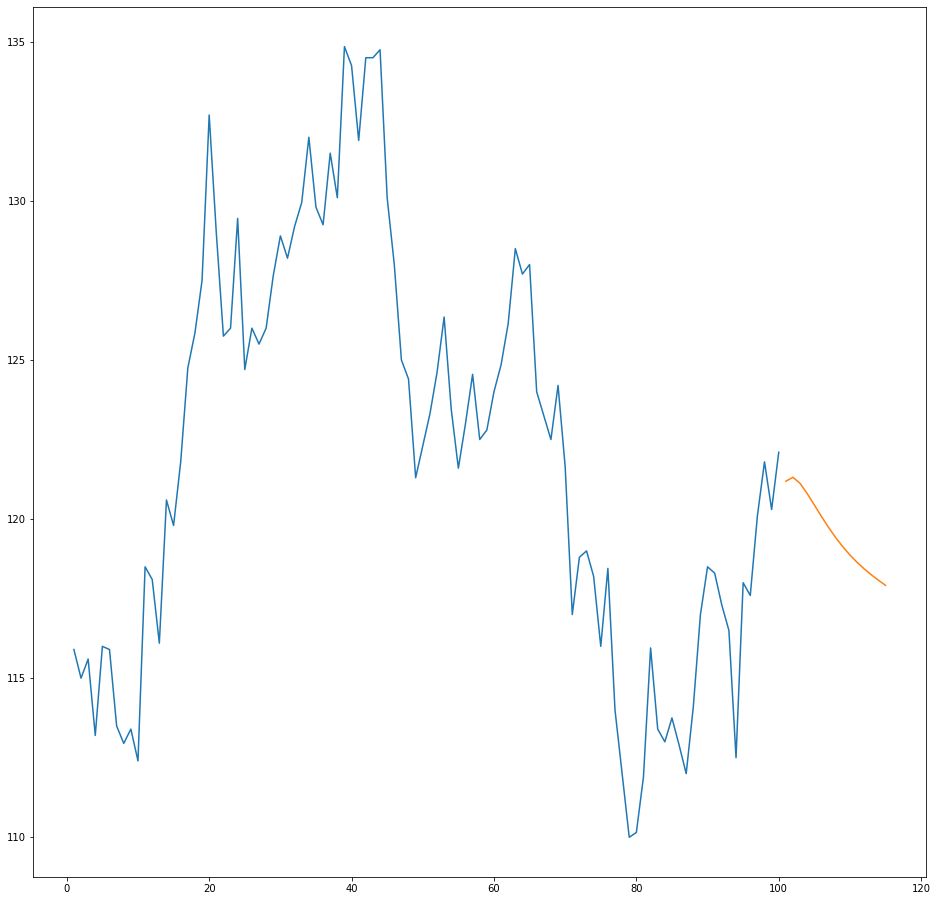

In [45]:
plt.subplots(figsize = (16,16))
plt.plot(day_new, sc.inverse_transform(df[1935:]))
plt.plot(day_pred, sc.inverse_transform(lst_output))